# HW 3 Fama Factors

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import math
import numpy as np
from scipy import stats
from scipy.stats import norm
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns

In [2]:
fac_5 = pd.read_csv('./F-F_Research_Data_5_Factors_2x3_daily.CSV')
fac_5.columns= ['date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

In [3]:
tickers = [a.strip('\n') for a in open('./tickers.txt').readlines()] #importing ticker list

In [132]:
start_date = '1963-07-01'
end = '2019-03-29'

#initialing lists for the required paramets and coefficients
Intercept = []
TStat = []
MktRF_coeff = []
SMB_coeff = []
HML_coeff = []
RMW_coeff = []
CMA_coeff = []
R_Squared = []


# looping over ticker list
for i,t in enumerate(tickers):
    try:
        print(i)
        company = data.DataReader(t, 'yahoo', start_date, end)

        company['Log']=np.log(company['Adj Close'])   #getting log adj close
        Returns=np.diff(company['Log'])*100
        Returns=np.append(0,Returns)
        company['Returns']=Returns    
                
        Y = company['Returns'] 
        Y = list(Y)      #setting up the dependent variable for the regression
        
        #setting up independent variable
        X = fac_5[['Mkt-RF','SMB', 'HML', 'RMW', 'CMA']][-len(Y):]    #making sure the dimensions for X and Y align
        X = sm.add_constant(X)
        
        model = sm.OLS(Y, X).fit()      #fitting OLS
        
        
        #appending the parameters to the initialized lists for each ticker
        
        Intercept.append(model.params[0])
        TStat.append(model.tvalues[0])
        MktRF_coeff.append(model.params[1])
        SMB_coeff.append(model.params[2])
        HML_coeff.append(model.params[3])
        RMW_coeff.append(model.params[4])
        CMA_coeff.append(model.params[5]) 
        R_Squared.append(model.rsquared)
    except:
            print('err')    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501


In [145]:
#Main matrix with all the parameters for the tickers
F5stats = pd.DataFrame()

F5stats['Ticker'] = tickers
F5stats['Intercept'] = Intercept
F5stats['TStat'] = TStat
F5stats['Mkt-Rf_coefficient'] = MktRF_coeff
F5stats['SMB_coefficient'] = SMB_coeff
F5stats['HML_coefficient'] = HML_coeff
F5stats['RMW_coefficient'] = RMW_coeff
F5stats['CMA_coefficient'] = CMA_coeff
F5stats['R_Squared'] = R_Squared



# A1) Matrix with constant and its tstatistics, Fama 5 factor coefficients, r_squared

In [134]:
F5stats.head()

,Ticker,Intercept,TStat,Mkt-Rf_coefficient,SMB_coefficient,HML_coefficient,RMW_coefficient,CMA_coefficient,R_Squared
0,A,0.011979,0.392814,1.202444,0.184069,-0.538822,-0.976220,0.157150,0.409616
1,AAL,-0.027949,-0.458207,1.407127,0.983580,0.937694,-0.446931,0.269879,0.290172
2,AAP,0.021518,0.782044,0.830724,0.220777,0.013640,0.458070,0.246716,0.212243
3,AAPL,0.083718,3.183537,1.070291,-0.082343,-0.477250,-0.188454,-1.011674,0.246083
4,ABBV,0.006529,0.176346,1.030953,-0.126385,-0.659878,-0.285824,0.291659,0.287255


# A2) Descriptive Statistics

In [148]:
#Descriptive statistics for the parameters

print(F5stats['Intercept'].describe())
print(F5stats['TStat'].describe())
print(F5stats['Mkt-Rf_coefficient'].describe())
print(F5stats['SMB_coefficient'].describe())
print(F5stats['HML_coefficient'].describe())
print(F5stats['RMW_coefficient'].describe())
print(F5stats['CMA_coefficient'].describe())
print(F5stats['R_Squared'].describe())



count    501.000000
mean       0.020005
std        0.035184
min       -0.192646
25%        0.000400
50%        0.018651
75%        0.040255
max        0.196460
Name: Intercept, dtype: float64
count    501.000000
mean       0.897746
std        1.323853
min       -2.482772
25%        0.019093
50%        0.846625
75%        1.666014
max        6.579373
Name: TStat, dtype: float64
count    501.000000
mean       1.026352
std        0.235330
min       -0.232066
25%        0.875451
50%        1.035793
75%        1.190179
max        1.718030
Name: Mkt-Rf_coefficient, dtype: float64
count    501.000000
mean       0.215500
std        0.332285
min       -0.513493
25%       -0.028381
50%        0.205237
75%        0.454390
max        1.959587
Name: SMB_coefficient, dtype: float64
count    501.000000
mean       0.133646
std        0.575202
min       -1.243265
25%       -0.206861
50%        0.051144
75%        0.372829
max        2.201964
Name: HML_coefficient, dtype: float64
count    501.000000
mea

# A3) PLOTS

In [135]:
#Function to plot non parametric density estimates and plot normal distribution with mean and variance equal to the 
#mean and variance of the parameters

def plot(variable):
    var = np.var(variable)
    mean = np.mean(variable)

    norm = np.random.normal(mean,var,len(variable))
    
    sns.kdeplot(norm,color='blue')
    sns.kdeplot(variable,color='red')

    plt.show()                                                   
    

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


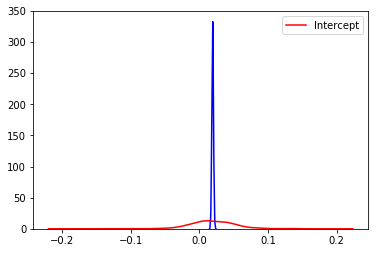

In [121]:
plot(F5stats['Intercept'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


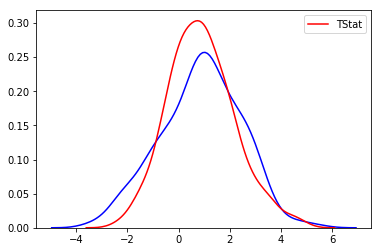

In [122]:
plot(F5stats['TStat'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


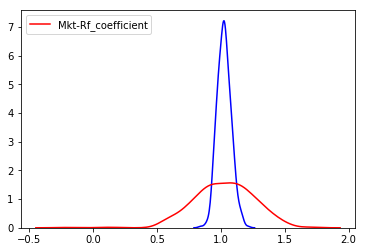

In [123]:
plot(F5stats['Mkt-Rf_coefficient'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


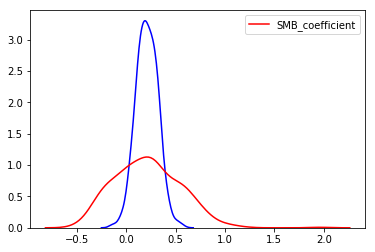

In [124]:
plot(F5stats['SMB_coefficient'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


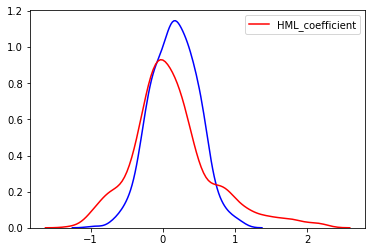

In [125]:
plot(F5stats['HML_coefficient'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


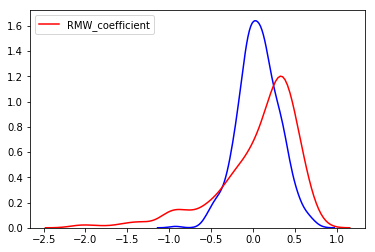

In [126]:
plot(F5stats['RMW_coefficient'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


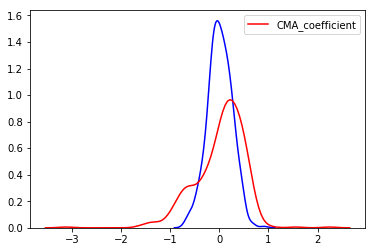

In [127]:
plot(F5stats['CMA_coefficient'])

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


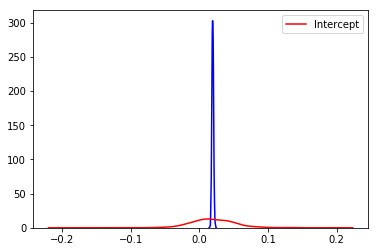

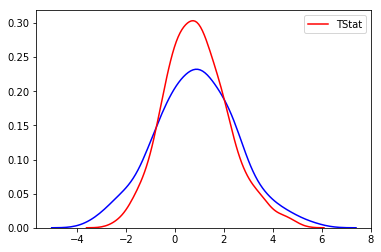

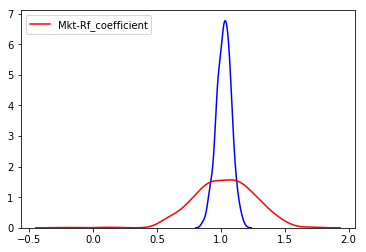

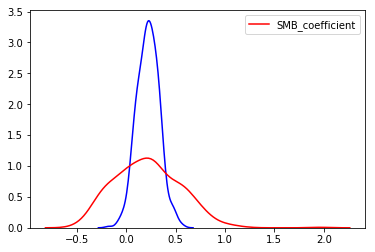

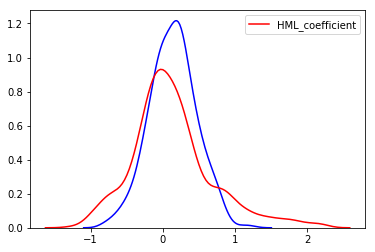

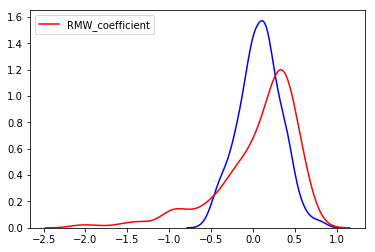

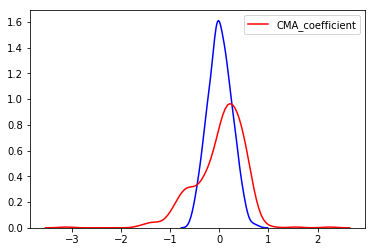

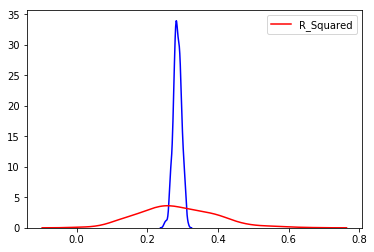

In [120]:
plot(F5stats['R_Squared'])


# A4) Highest and lowest constants

In [147]:
# sorting and printing tickets with highest and lowest intercepts

F5stats = F5stats.sort_values('Intercept', ascending=False)
Intercepts_sorted = F5stats[['Ticker','Intercept']]
Intercepts_sorted = Intercepts_sorted.reset_index()
print('Top 5 stocks with highest constant:' )
print(Intercepts_sorted[0:5])
print('\n')

F5stats = F5stats.sort_values('Intercept', ascending=True)
Intercepts_sorted_asc = F5stats[['Ticker','Intercept']]
Intercepts_sorted_asc = Intercepts_sorted_asc.reset_index()
print('5 stocks with lowest constant:' )
print(Intercepts_sorted_asc[0:5])

Top 5 stocks with highest constant:
   index Ticker  Intercept
0     65    BHF   0.196460
1    436    TJX   0.135350
2    353    OKE   0.134704
3    338    NKE   0.132642
4    294     LW   0.128337


5 stocks with lowest constant:
   index Ticker  Intercept
0    450     UA  -0.192646
1    113   COTY  -0.132944
2    269    KHC  -0.113201
3    447   TWTR  -0.077182
4    487    WRK  -0.067682


Companies with the highest Intercepts are Brighthouse Finacial Inc, TJX Companies, ONEOK Inc, Nike Inc, 
Lamb Weston Holdings Inc. These are companies whose returns are least explained by the Fama factors.

Companies with the lowest Intercepts are Under Armour, Coty Inc, Kraft Heinz, Twitter, Westrock Co.
These are companies whose returns are most explained by the Fama factors. 
